<h1><b>Data Analyst Demo</b></h1>
Data is from Uber. Theirs 2014 years data it is . We will perform basic operation of data analysis which is also implemented in R .

In [0]:
april=pd.read_csv("/content/uber-raw-data-apr14.csv")
may=pd.read_csv("/content/uber-raw-data-may14.csv")
june=pd.read_csv("/content/uber-raw-data-jun14.csv")
july=pd.read_csv("/content/uber-raw-data-jul14.csv")
aug=pd.read_csv("/content/uber-raw-data-aug14.csv")
sep=pd.read_csv("/content/uber-raw-data-sep14.csv")

In [0]:
data_2014 = pd.DataFrame()
file_list = [april,may,june,july,aug,sep]

for file in file_list:
  data_2014 = pd.concat([data_2014,file])


In [27]:
data_2014.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [28]:
len(data_2014)

4534327

In [29]:
data_2014.describe()

,Lat,Lon
count,4.534327e+06,4.534327e+06
mean,4.073926e+01,-7.397302e+01
std,3.994991e-02,5.726670e-02
min,3.965690e+01,-7.492900e+01
25%,4.072110e+01,-7.399650e+01
50%,4.074220e+01,-7.398340e+01
75%,4.076100e+01,-7.396530e+01
max,4.211660e+01,-7.206660e+01


In [30]:
data_2014.describe(include=["O"])

,Date/Time,Base
count,4534327,4534327
unique,260093,5
top,4/7/2014 20:21:00,B02617
freq,97,1458853


In [0]:
data_2014['Date/Time'] =  pd.to_datetime(data_2014['Date/Time'])

In [40]:
data_2014['Date/Time']

0         2014-04-01 00:11:00
1         2014-04-01 00:17:00
2         2014-04-01 00:21:00
3         2014-04-01 00:28:00
4         2014-04-01 00:33:00
                  ...        
1028131   2014-09-30 22:57:00
1028132   2014-09-30 22:57:00
1028133   2014-09-30 22:58:00
1028134   2014-09-30 22:58:00
1028135   2014-09-30 22:58:00
Name: Date/Time, Length: 4534327, dtype: datetime64[ns]

In [0]:
from datetime import datetime as dt
data_2014["year"] = data_2014['Date/Time'].dt.year

In [42]:
data_2014.head()

,Date/Time,Lat,Lon,Base,year
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014


In [0]:
data_2014["day"]=data_2014['Date/Time'].dt.day

In [0]:
data_2014["month"]=data_2014['Date/Time'].dt.month

In [0]:
data_2014["hour"]=data_2014['Date/Time'].dt.hour

In [0]:
data_2014["minute"]=data_2014['Date/Time'].dt.minute

In [0]:
data_2014["second"]=data_2014['Date/Time'].dt.second

In [59]:
data_2014.head()

,Date/Time,Lat,Lon,Base,year,day,month,hour,minute,second,weekday_int,weekday
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,2014,1,4,0,11,0,1,Tuesday
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,2014,1,4,0,17,0,1,Tuesday
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,2014,1,4,0,21,0,1,Tuesday
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,2014,1,4,0,28,0,1,Tuesday
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,2014,1,4,0,33,0,1,Tuesday


In [0]:
# weekdays as a tuple

weekDays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

data_2014["weekday_int"]=data_2014['Date/Time'].dt.weekday

In [0]:
data_2014["weekday"] =data_2014['Date/Time'].dt.day_name()

In [0]:
#plotting the trip by the hours in a day
 hour_data =data_2014.groupby("hour").count()

In [0]:
display(hour_data["Date/Time"])

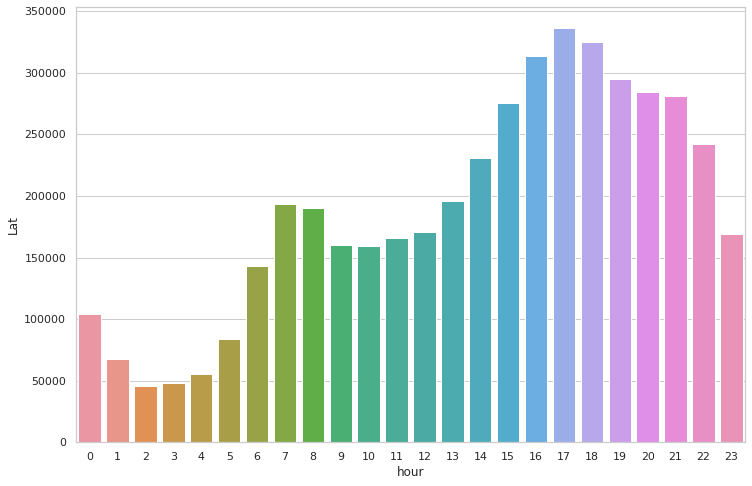

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
plt.figure(figsize=(12,8))
sns.barplot(x=hour_data.index,y=hour_data.Lat)


In [99]:
month_data = data_2014.groupby("month").count()
month_data

,Date/Time,Lat,Lon,Base,year,day,hour,minute,second,weekday_int,weekday
month,,,,,,,,,,,
4,564516,564516,564516,564516,564516,564516,564516,564516,564516,564516,564516
5,652435,652435,652435,652435,652435,652435,652435,652435,652435,652435,652435
6,663844,663844,663844,663844,663844,663844,663844,663844,663844,663844,663844
7,796121,796121,796121,796121,796121,796121,796121,796121,796121,796121,796121
8,829275,829275,829275,829275,829275,829275,829275,829275,829275,829275,829275
9,1028136,1028136,1028136,1028136,1028136,1028136,1028136,1028136,1028136,1028136,1028136


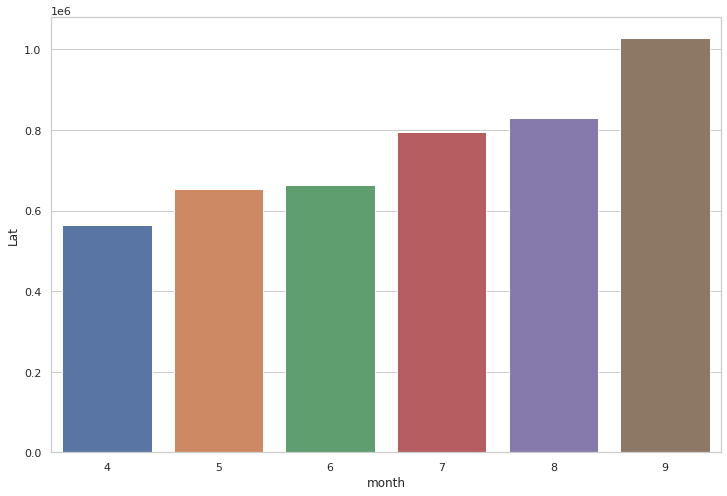

In [101]:
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
sns.barplot(x=month_data.index,y=month_data.Lat)

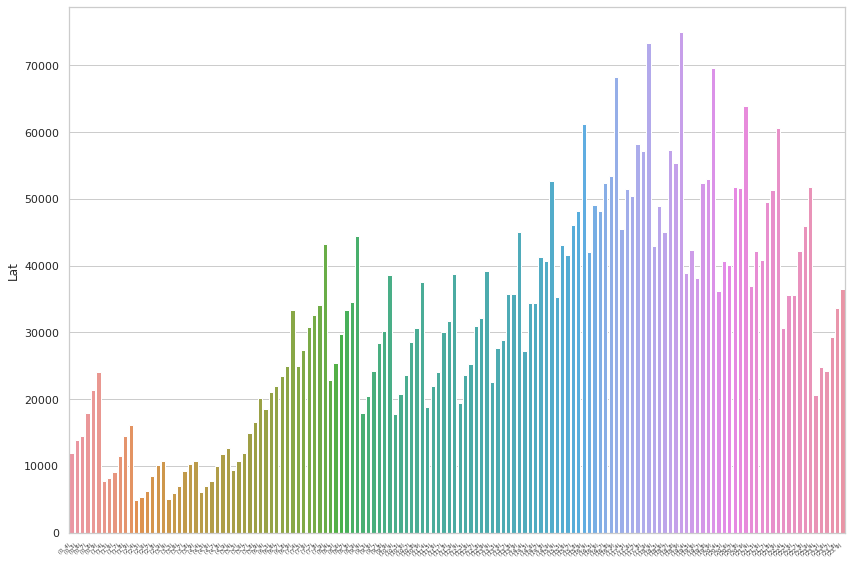

In [111]:
month_hour_data = data_2014.groupby(["hour","month"]).count()
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.barplot(x=month_hour_data.index,y=month_hour_data.Lat)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=5)
plt.tight_layout()
plt.show()

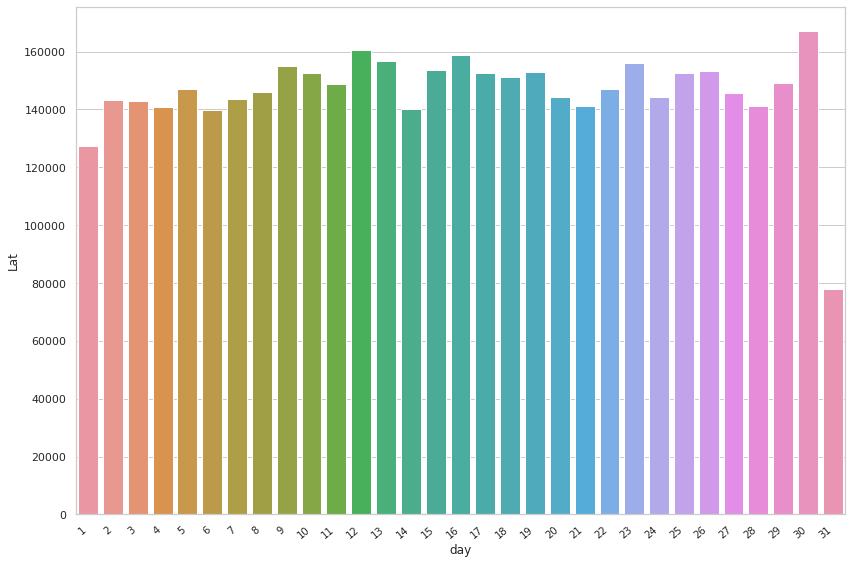

In [113]:
day_group = data_2014.groupby("day").count()
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.barplot(x=day_group.index,y=day_group.Lat)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10)
plt.tight_layout()
plt.show()


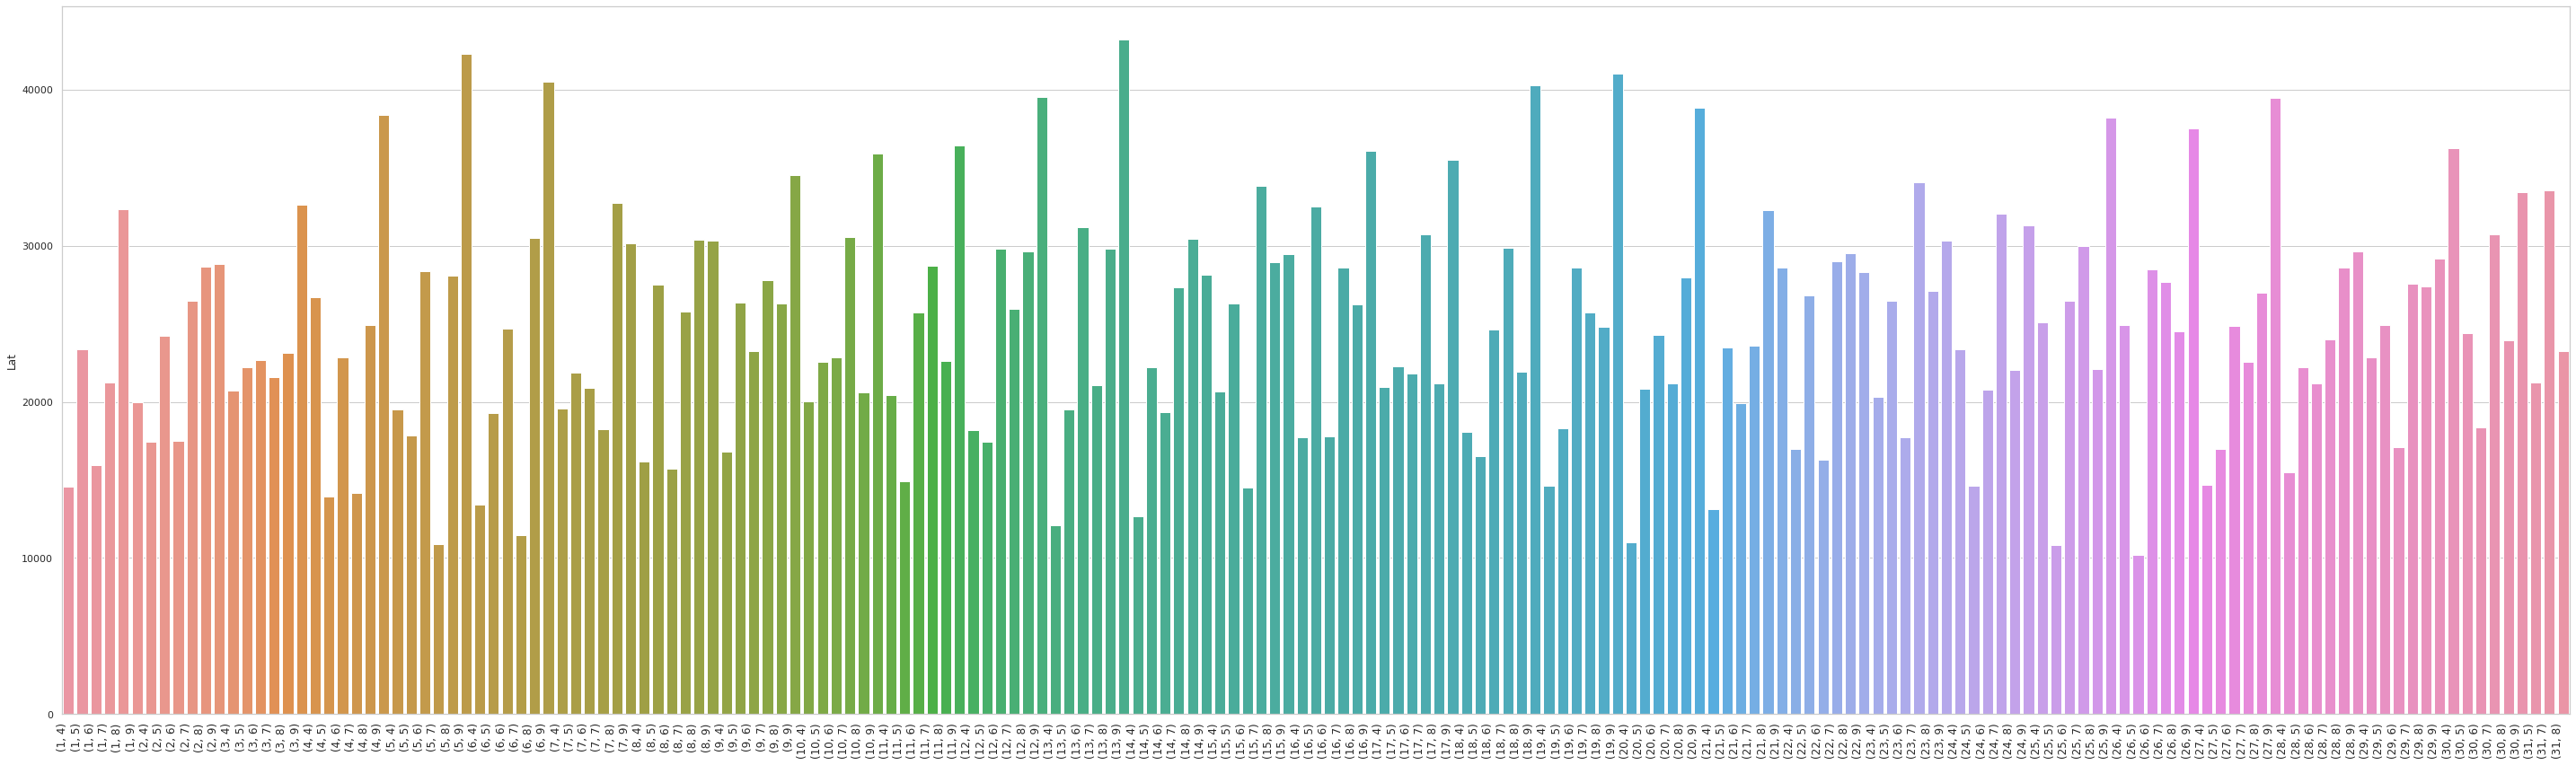

In [121]:
day_month_group = data_2014.groupby(["day","month"]).count()
plt.figure(figsize=(40,12))
sns.set(style="whitegrid")
ax = sns.barplot(x=day_month_group.index,y=day_month_group.Lat)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=12)
plt.tight_layout()
plt.show()

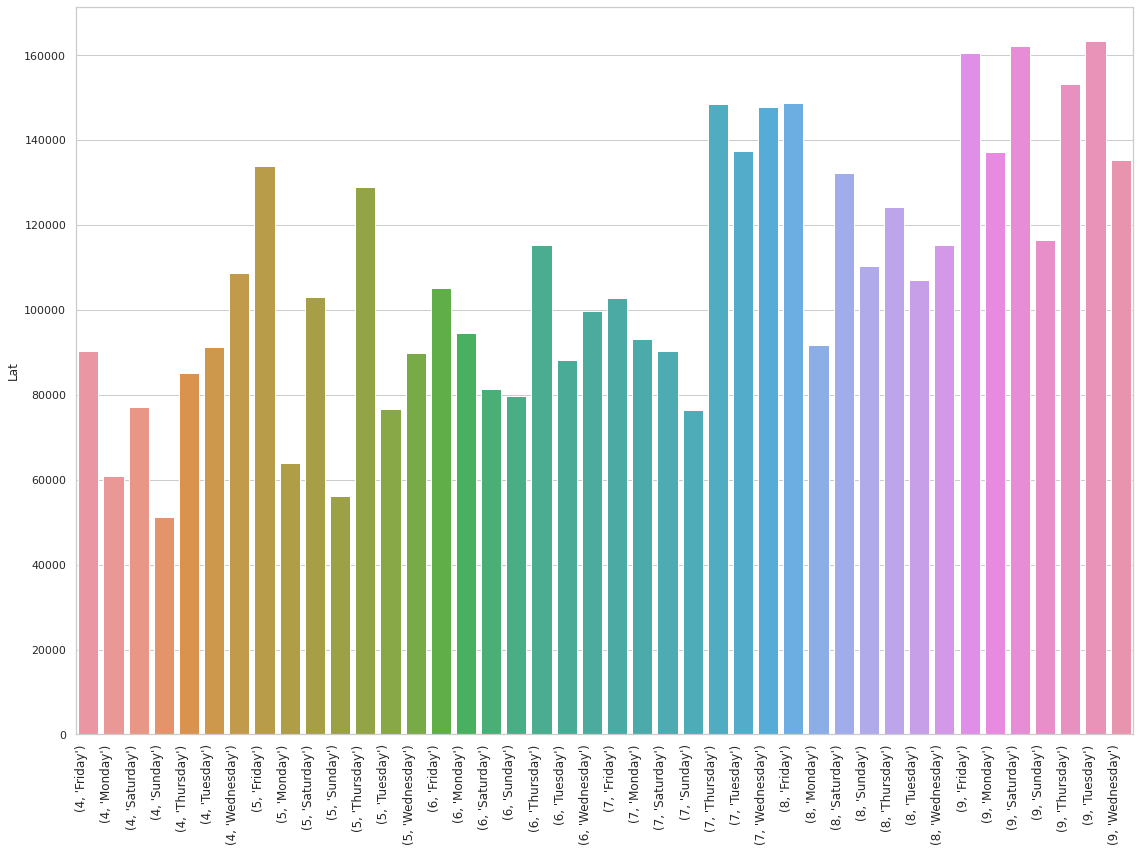

In [125]:
month_weekday = data_2014.groupby(["month","weekday"]).count()
plt.figure(figsize=(16,12))
sns.set(style="whitegrid")
ax = sns.barplot(x=month_weekday.index,y=month_weekday.Lat)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=12)
plt.tight_layout()
plt.show()

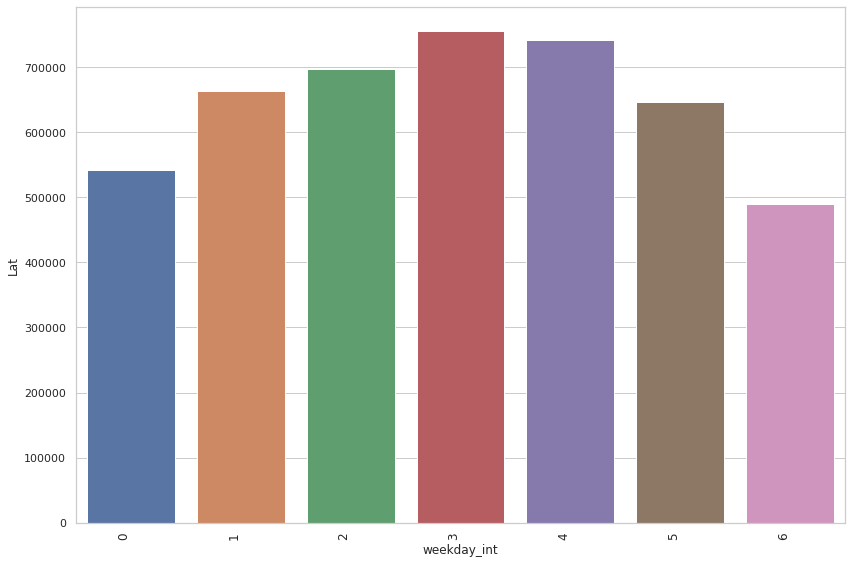

In [128]:
weekday = data_2014.groupby("weekday_int").count()
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.barplot(x=weekday.index,y=weekday.Lat)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=12)
plt.tight_layout()
plt.show()

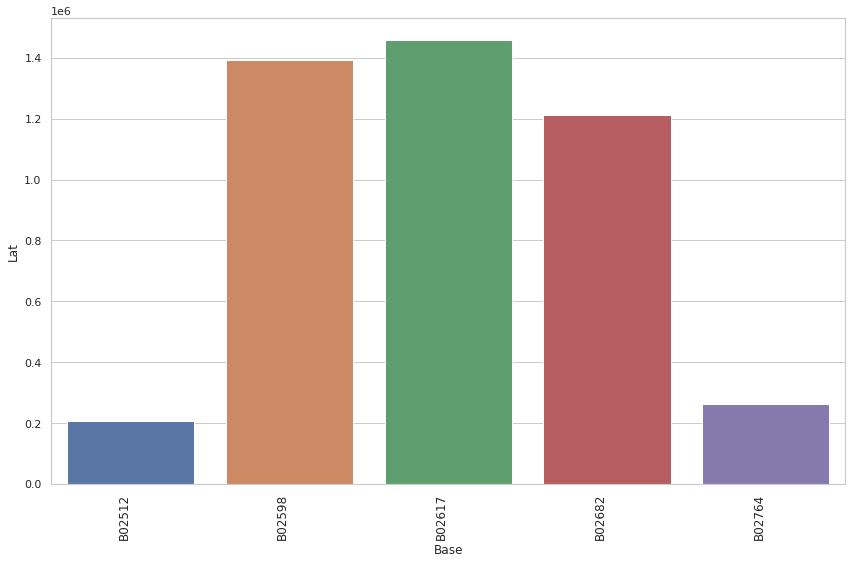

In [129]:
base_wise = data_2014.groupby("Base").count()
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.barplot(x=base_wise.index,y=base_wise.Lat)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=12)
plt.tight_layout()
plt.show()

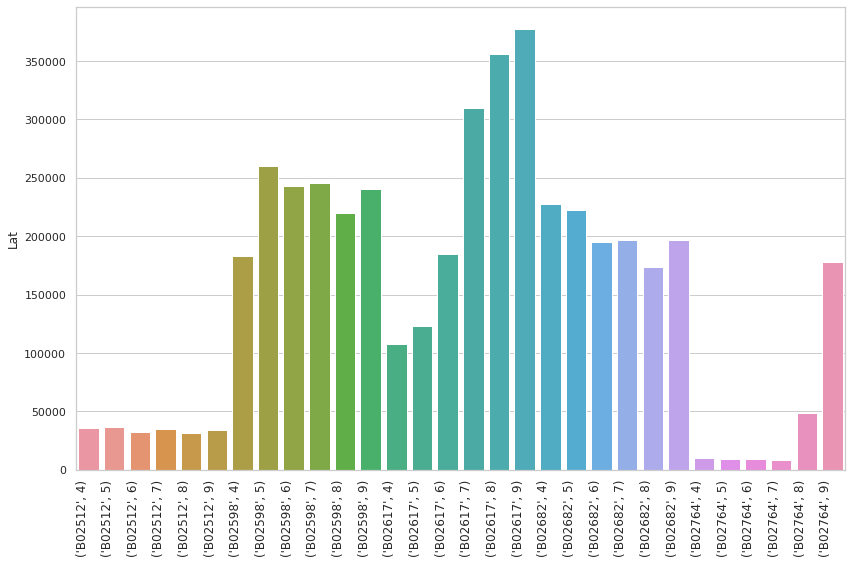

In [138]:
base_month_wise = data_2014.groupby(["Base","month"]).count()
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.barplot(x=base_month_wise.index,y=base_month_wise.Lat)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=12)
plt.tight_layout()
plt.show()

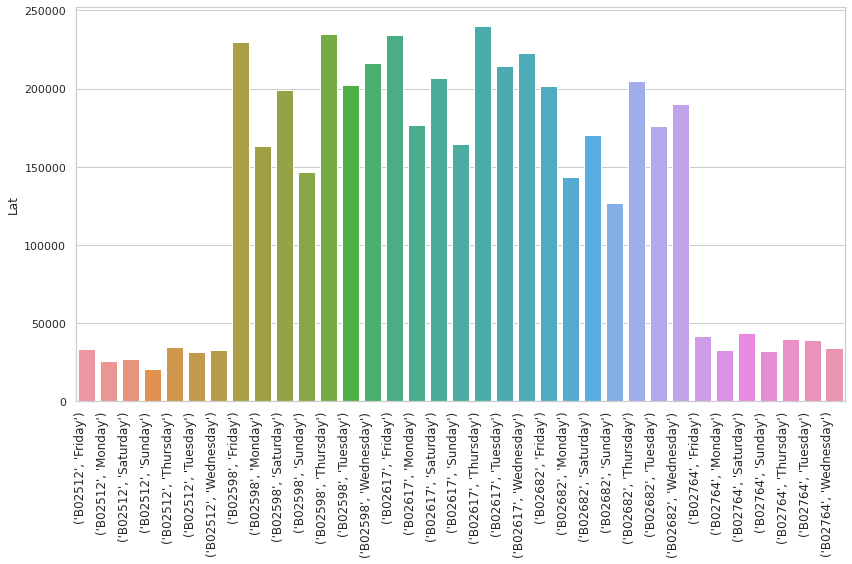

In [139]:
base_week_wise = data_2014.groupby(["Base","weekday"]).count()
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.barplot(x=base_week_wise.index,y=base_week_wise.Lat)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=12)
plt.tight_layout()
plt.show()

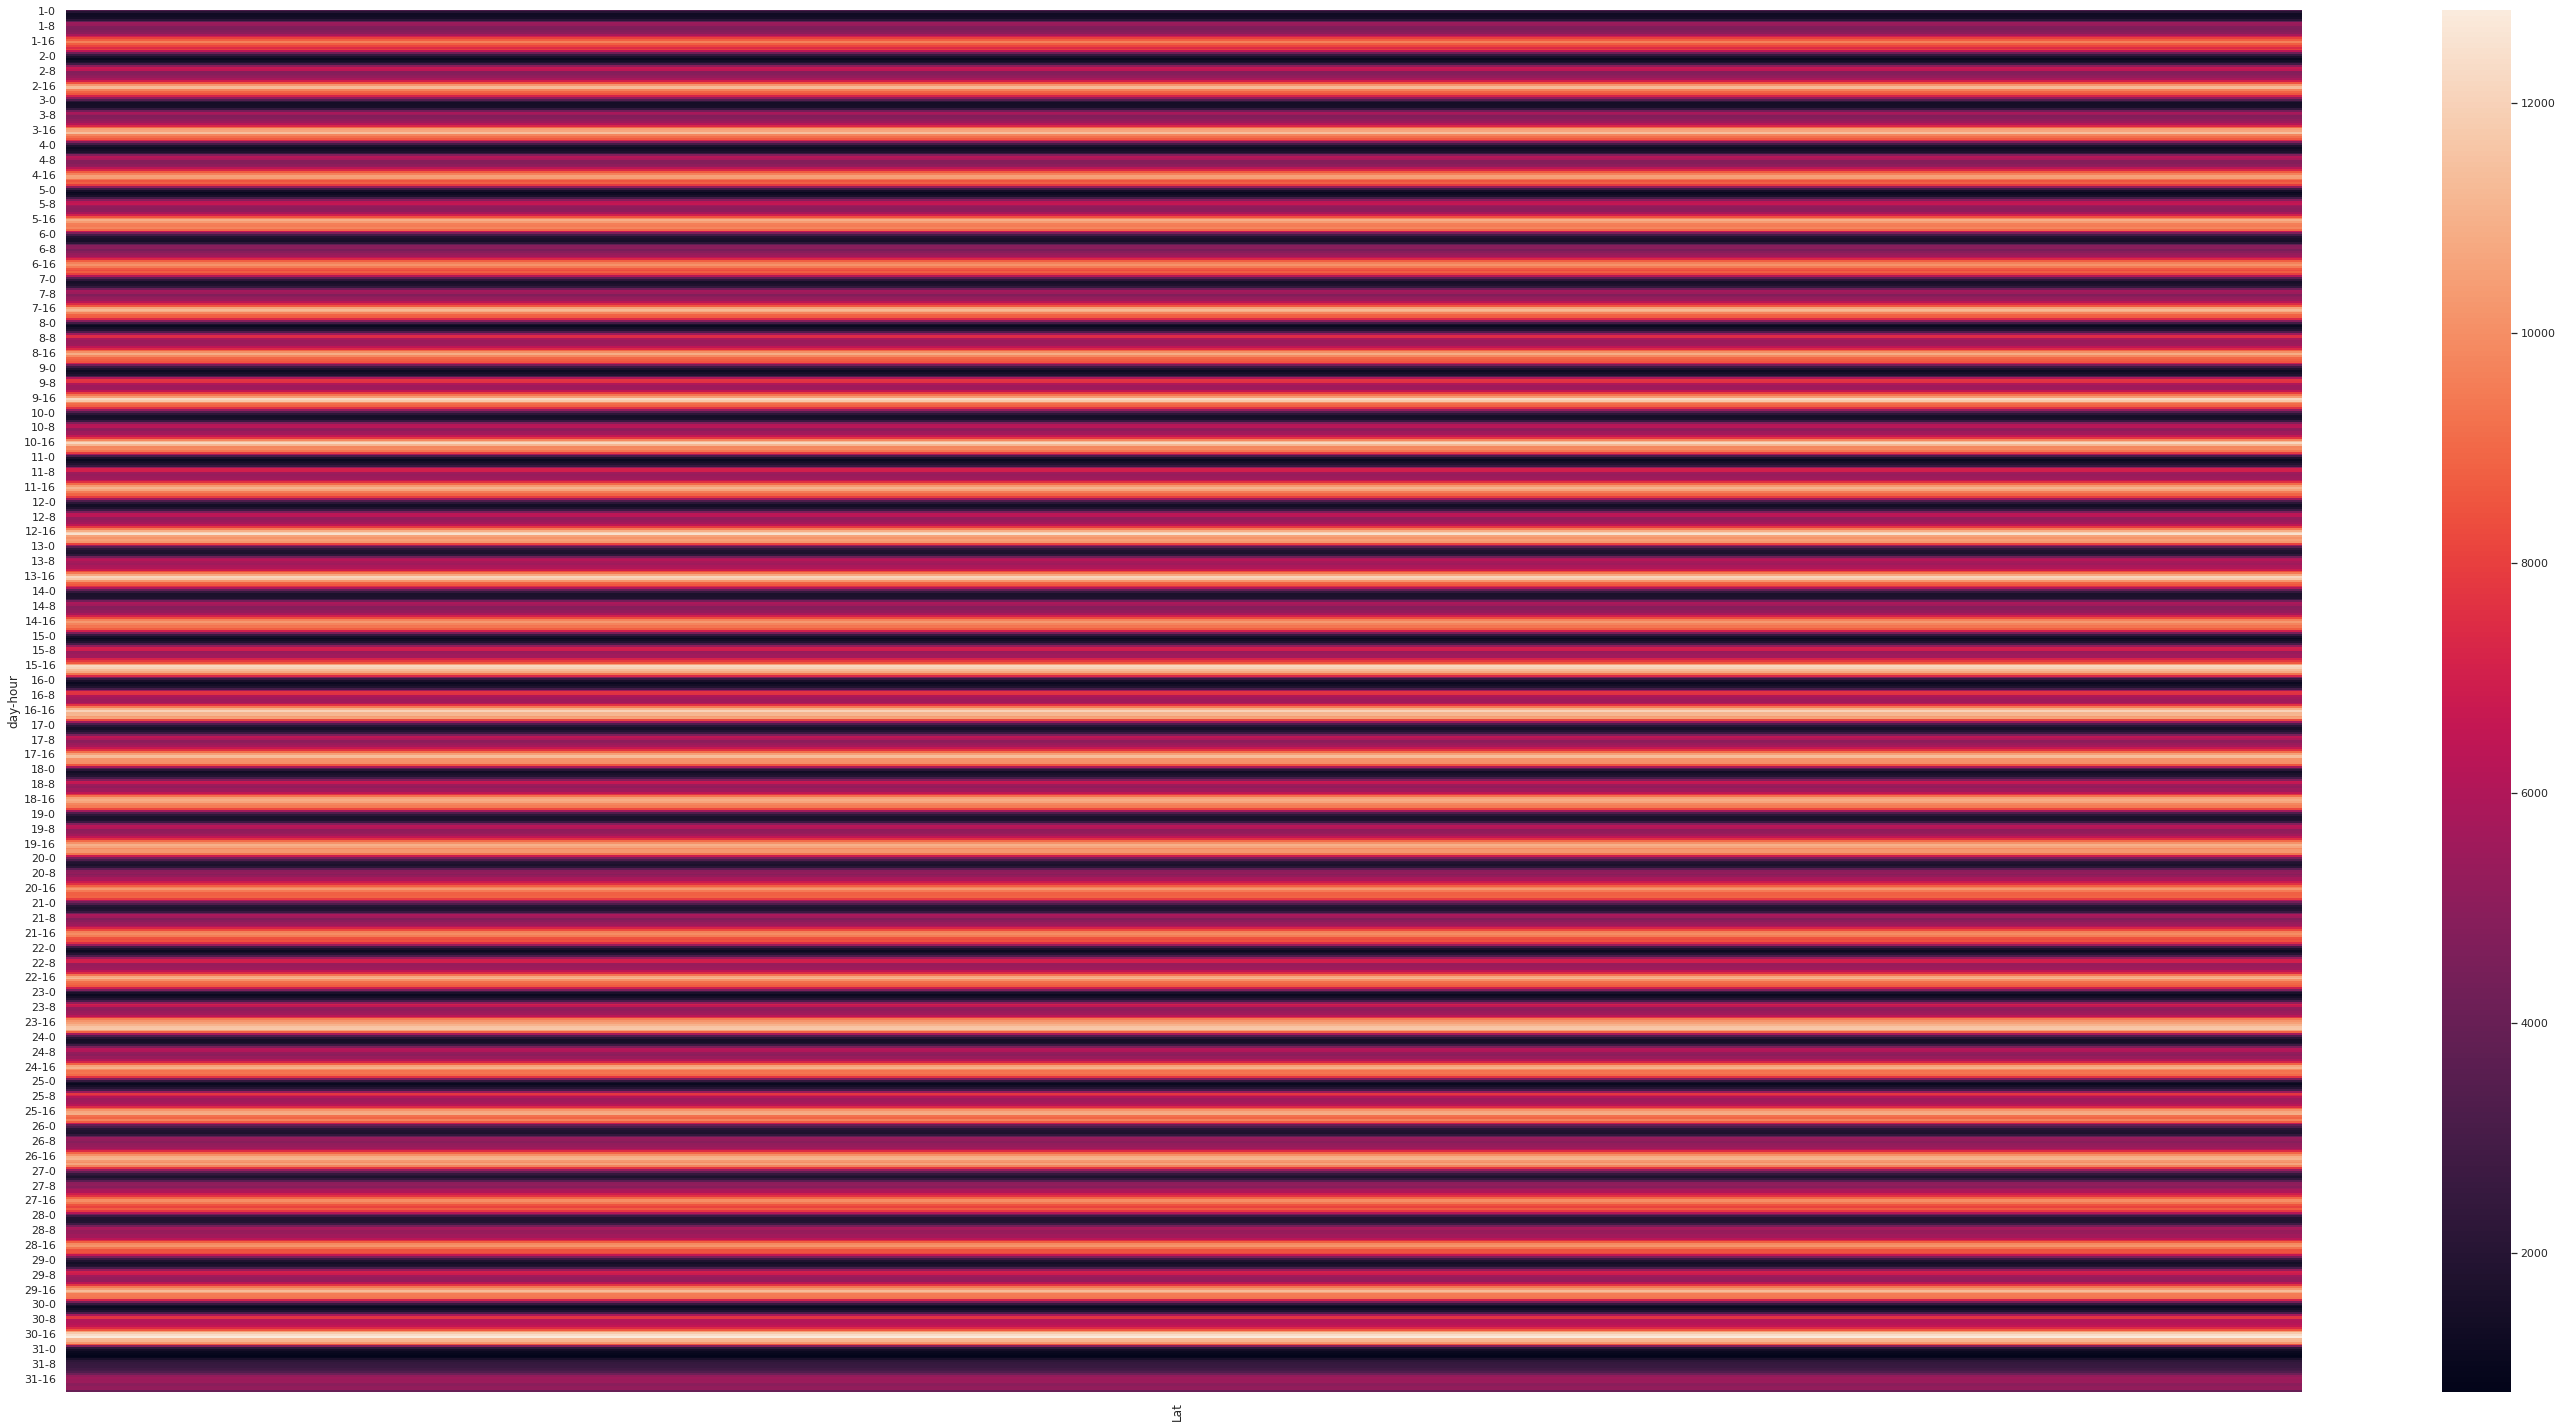

In [179]:
day_hour = data_2014.groupby(["day","hour"])[["Lat"]].count()
plt.figure(figsize=(40,20))
sns.set(style="whitegrid")
ax = sns.heatmap(day_hour)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=12)
plt.tight_layout()
plt.show()


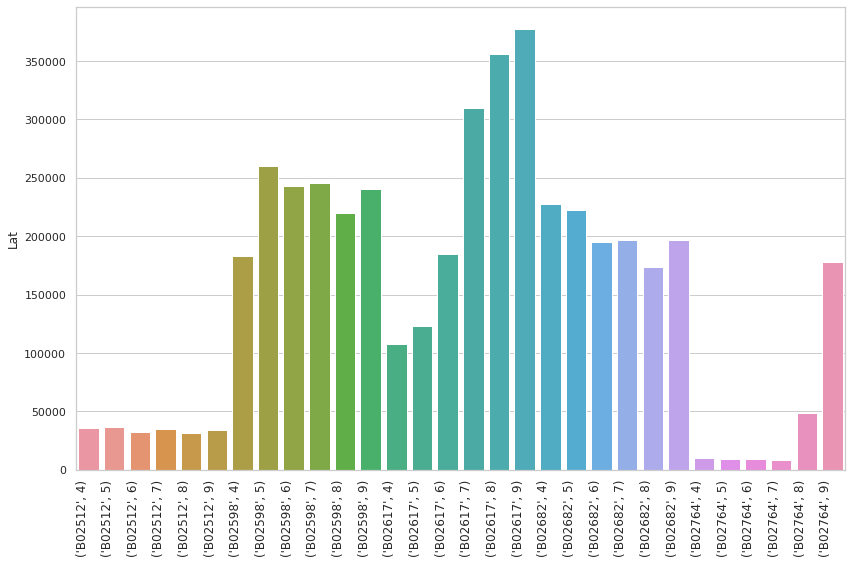

In [180]:
base_month_wise = data_2014.groupby(["Base","month"]).count()
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.barplot(x=base_month_wise.index,y=base_month_wise.Lat)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=12)
plt.tight_layout()
plt.show()

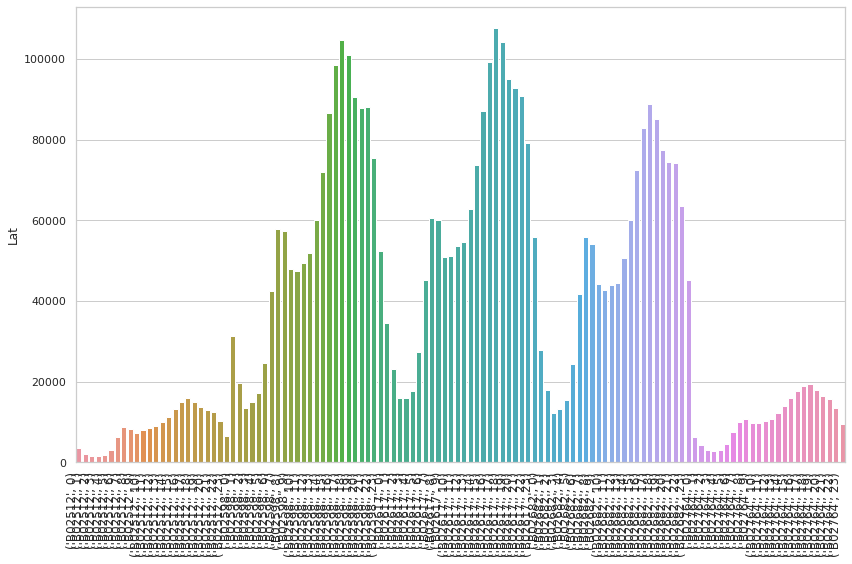

In [181]:
base_hour_wise = data_2014.groupby(["Base","hour"]).count()
plt.figure(figsize=(12,8))
sns.set(style="whitegrid")
ax = sns.barplot(x=base_hour_wise.index,y=base_hour_wise.Lat)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=12)
plt.tight_layout()
plt.show()

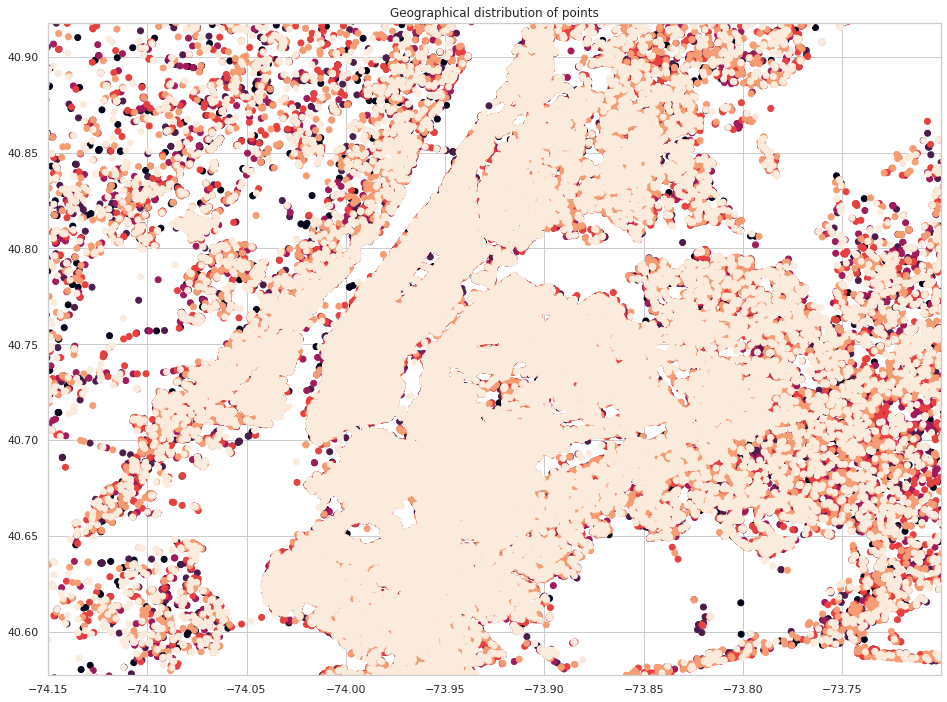

In [188]:
min_lat = 40.5774
max_lat = 40.9176
min_long = -74.15
max_long = -73.7004
plt.figure(figsize=(16,12))
plt.title("Geographical distribution of points monthly")
plt.scatter(x=data_2014.Lon,y=data_2014.Lat,c=data_2014.month.values)
plt.xlim(min_long,max_long)
plt.ylim(min_lat,max_lat)
plt.show()

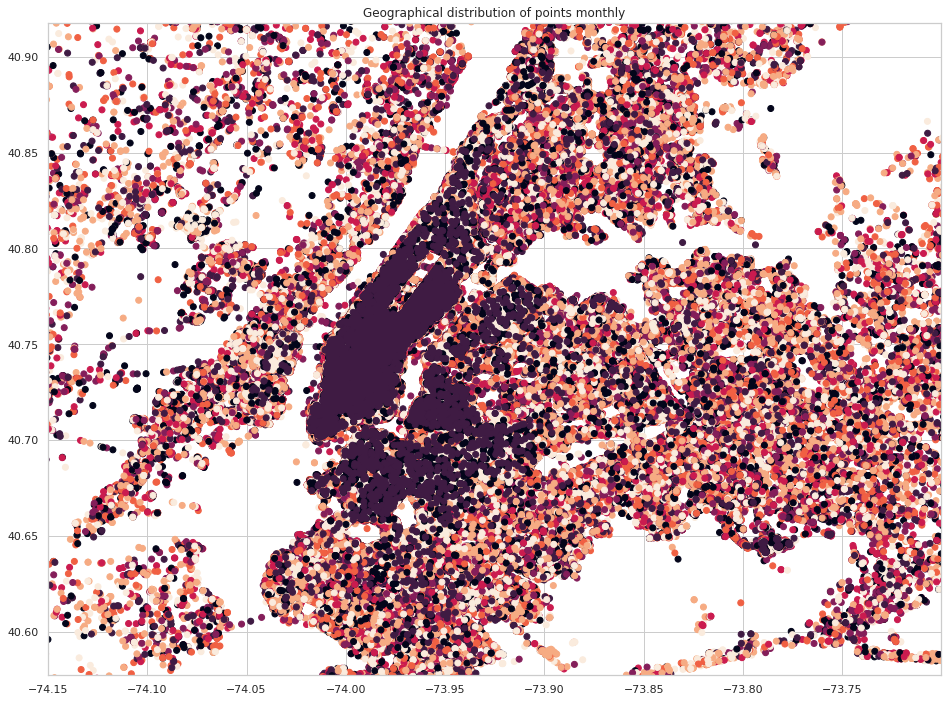

In [192]:
min_lat = 40.5774
max_lat = 40.9176
min_long = -74.15
max_long = -73.7004
plt.figure(figsize=(16,12))
plt.title("Geographical distribution of points daywise")
plt.scatter(x=data_2014.Lon,y=data_2014.Lat,c=data_2014.weekday_int.values)
plt.xlim(min_long,max_long)
plt.ylim(min_lat,max_lat)
plt.show()